# Logistic Regression (logit) for Binary Dependent Variables

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [84]:
#Uncomment lines below to create random data for testing purposes 
#n = 1000
#data['gender'] = np.random.choice(['Male', 'Female'], size=n)
#data['age'] = np.random.randint(18, 65, size=n)
#data['visits'] = np.random.randint(0, 10, size=n)
#data['past_purchases'] = np.random.randint(0, 10, size=n)
#data['sold'] = np.random.randint(0, 1, size=n)

In [85]:
df = pd.read_csv('../data/logit_data.csv')
df.columns

Index(['purchased', 'gender', 'age', 'visits', 'past_purchases'], dtype='object')

In [86]:
X = df[['gender', 'age', 'visits', 'past_purchases']] #Create dataframe for indpenedent variables
X = pd.get_dummies(X, drop_first=True, dtype=int)  #Convert gender variable to dummy variables
X = sm.add_constant(X)  #Add a constant term to the independent variables
y = df['purchased'] #Create dataframe for dependent variable
X.head()

,const,age,visits,past_purchases,gender_M
0,1.0,23,3,0,1
1,1.0,24,3,0,1
2,1.0,18,1,1,1
3,1.0,26,4,1,0
4,1.0,19,2,1,1


In [87]:
#Fit the model
model = sm.Logit(y, X)
result = model.fit()
result.summary2() #Summary2 includes AIC and BIC

Optimization terminated successfully.
         Current function value: 0.536389
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Method:           MLE      
Dependent Variable: purchased        Pseudo R-squared: 0.225    
Date:               2023-12-11 21:25 AIC:              63.6389  
No. Observations:   50               BIC:              73.1990  
Df Model:           4                Log-Likelihood:   -26.819  
Df Residuals:       45               LL-Null:          -34.617  
Converged:          1.0000           LLR p-value:      0.0036124
No. Iterations:     6.0000           Scale:            1.0000   
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
const            -1.2181   1.5258 -0.7984 0.4247 -4.2085  1.7723
age               0.0415   0.0275  1.5066 0.1319 -0.0125  0.0954
visits           -0.1541   0.3253 -0.4738 0.6356 -0.7916  0.4834
past_purchases    0.7168   0.5567  1.2875 0.1979 -0.3744  1.8080
gender_M         -1.4647   0.7113 -2.0592 0.0395 -2.8589 -0.0706
================================================================

"""

In [88]:
#Predicted Probabilities
y_probabilities = result.predict(X) #Get probabilities for each observation
y_probabilities

0     0.100492
1     0.104302
2     0.201974
3     0.490012
4     0.184425
5     0.197221
6     0.197221
7     0.199081
8     0.484165
9     0.186191
10    0.543302
11    0.178271
12    0.232099
13    0.382327
14    0.316513
15    0.402086
16    0.848062
17    0.501507
18    0.337325
19    0.499920
20    0.260689
21    0.265224
22    0.322887
23    0.207691
24    0.436637
25    0.310018
26    0.284065
27    0.837068
28    0.517713
29    0.761799
30    0.707673
31    0.744209
32    0.730421
33    0.653713
34    0.832970
35    0.781635
36    0.538370
37    0.736239
38    0.496995
39    0.813175
40    0.895265
41    0.725340
42    0.864775
43    0.980603
44    0.938202
45    0.947145
46    0.413414
47    0.811323
48    0.754113
49    0.844130
dtype: float64

In [89]:
y_predictions = np.round(y_probabilities) #Round probabilities to 0 (no) or 1 (yes)
y_predictions = y_predictions.astype(int) #Float to Int 
y_predictions

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    1
11    0
12    0
13    0
14    0
15    0
16    1
17    1
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    0
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    0
47    1
48    1
49    1
dtype: int64

In [90]:
coefficients = result.params
odds_ratios = np.exp(coefficients)

print("Odds Ratios:")
print(odds_ratios)
#Exponentiating a logit coefficient provides the odds ratio associated with a one-unit increase in the corresponding predictor variable. 
#For example, if the exponentiated coefficient is 2, it indicates that a one-unit increase in the predictor variable is associated with a doubling of the odds of the positive outcome.

Odds Ratios:
const             0.295795
age               1.042322
visits            0.857184
past_purchases    2.047895
gender_M          0.231137
dtype: float64


In [91]:
#Calculate marginal effects
#Marginal effect: To obtain the marginal effect of a predictor variable, you can calculate the derivative of the predicted probabilities with respect to that variable. 
#The marginal effect represents the change in the predicted probability of the positive outcome due to a one-unit change in the predictor variable.
marginal_effects = result.get_margeff(at='mean')
print(marginal_effects.summary())

        Logit Marginal Effects       
Dep. Variable:              purchased
Method:                          dydx
At:                              mean
                    dy/dx    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0103      0.007      1.509      0.131      -0.003       0.024
visits            -0.0383      0.081     -0.474      0.636      -0.197       0.120
past_purchases     0.1780      0.138      1.291      0.197      -0.092       0.448
gender_M          -0.3638      0.176     -2.065      0.039      -0.709      -0.018


In [92]:
#Interpret as % change in Y from a 1% increase in X
elasticities = result.get_margeff(at='mean',method='eyex')
print(elasticities.summary())

        Logit Marginal Effects       
Dep. Variable:              purchased
Method:                          eyex
At:                              mean
               d(lny)/d(lnx)    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.6702      0.454      1.476      0.140      -0.219       1.560
visits               -0.1727      0.366     -0.472      0.637      -0.889       0.544
past_purchases        0.5137      0.402      1.278      0.201      -0.274       1.301
gender_M             -0.3768      0.191     -1.978      0.048      -0.750      -0.003


In [93]:
#Confusion Matrix
cm = confusion_matrix(y, y_predictions)
print(cm)
TP = cm[0,0] #True Positives
FN = cm[0,1] #False Negatives
FP = cm[1,0] #False Positives
TN = cm[1,1] #True Negatives

[[19  5]
 [ 7 19]]


In [94]:
#Accuracy = % of predictions made correctly
accuracy = accuracy_score(y, y_predictions)
print("Accuracy:", accuracy)

Accuracy: 0.76


In [95]:
#Precision = TP / (TP + FP) 
#Precision tells the percentage of correct positive predictions relative to total positive predictions

#Recall = TP / (TP + FN)
#Recall tells the percentage of correct positive predictions relative to total actual positives

#F1-Score is the weighted harmonic mean of precision and recall. It provides a single metric that balances both precision and recall. 

#Support is the number of actual instances of each outcome in the dataset

report = classification_report(y, y_predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        24
           1       0.79      0.73      0.76        26

    accuracy                           0.76        50
   macro avg       0.76      0.76      0.76        50
weighted avg       0.76      0.76      0.76        50



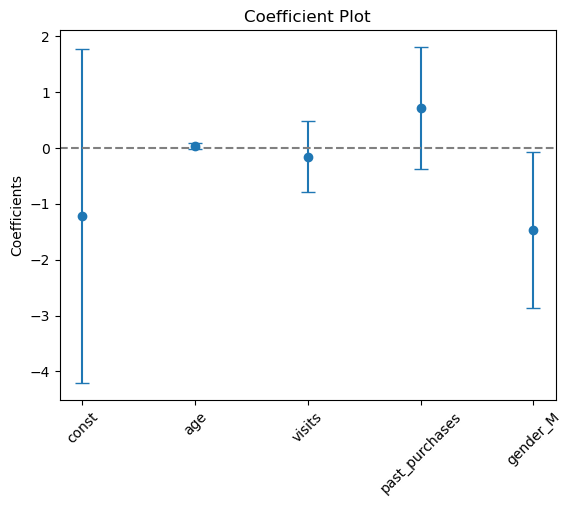

In [96]:
#Coefficient Plot
coefficients = result.params
conf_int = result.conf_int()
plt.errorbar(coefficients.index, coefficients, yerr=(coefficients - conf_int[0], conf_int[1] - coefficients), fmt='o', capsize=5)
plt.axhline(0, color='gray', linestyle='--')  
plt.ylabel('Coefficients')
plt.title('Coefficient Plot')
plt.xticks(rotation=45)
plt.show() 

In [97]:
#Prediction on new data
prediction_data = pd.DataFrame({'gender_M': ['Male', 'Female','Male'],
                         'age': [30, 40, 50],
                         'visits': [5, 8, 2],
                         'past_purchases': [2, 6, 0]})

prediction_data = pd.get_dummies(prediction_data, drop_first=True, dtype=int)  
prediction_data = sm.add_constant(prediction_data)  
y_probabilities = result.predict(prediction_data)
y_predictions = np.round(y_probabilities)  
y_predictions = y_predictions.astype(int)

print("Predictions:", y_predictions)
print("Probabilities:", y_probabilities)

Predictions: 0    0
1    1
2    0
dtype: int64
Probabilities: 0    0.315142
1    0.970915
2    0.285267
dtype: float64


In [98]:
#Calculate column means
mean_age = X['age'].mean()
mean_visits = X['visits'].mean()
mean_past_purchases = X['past_purchases'].mean()
mean_gender = X['gender_M'].mean()
n = len(X)

#Generate span variables
age_span = np.linspace(X['age'].min(), X['age'].max(), len(X))
visits_span = np.linspace(X['visits'].min(), X['visits'].max(), len(X))
past_purchases_span = np.linspace(X['past_purchases'].min(), X['past_purchases'].max(), len(X))
gender_M_span = np.linspace(X['gender_M'].min(), X['gender_M'].max(), len(X))

#Set all variables equal to mean value.  Use one span variable to evaluate effect over span of variable
#Age is used as span here
df = pd.DataFrame({
    'const': np.full(n, 1),
    'age': age_span,
    'visits': np.full(n, mean_visits),
    'past_purchases': np.full(n, mean_past_purchases),
    'gender': np.full(n, mean_gender)
})

df.head()

,const,age,visits,past_purchases,gender
0,1,18.000000,2.44,1.56,0.56
1,1,18.938776,2.44,1.56,0.56
2,1,19.877551,2.44,1.56,0.56
3,1,20.816327,2.44,1.56,0.56
4,1,21.755102,2.44,1.56,0.56


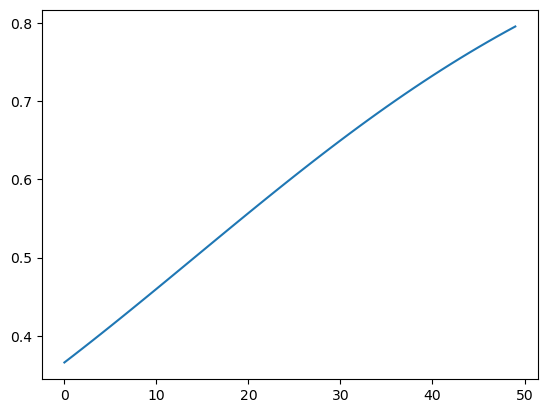

In [99]:
yhat_probabilities = result.predict(df)
yhat = np.round(yhat_probabilities)  
yhat = yhat.astype(int)
plt.plot(yhat_probabilities)

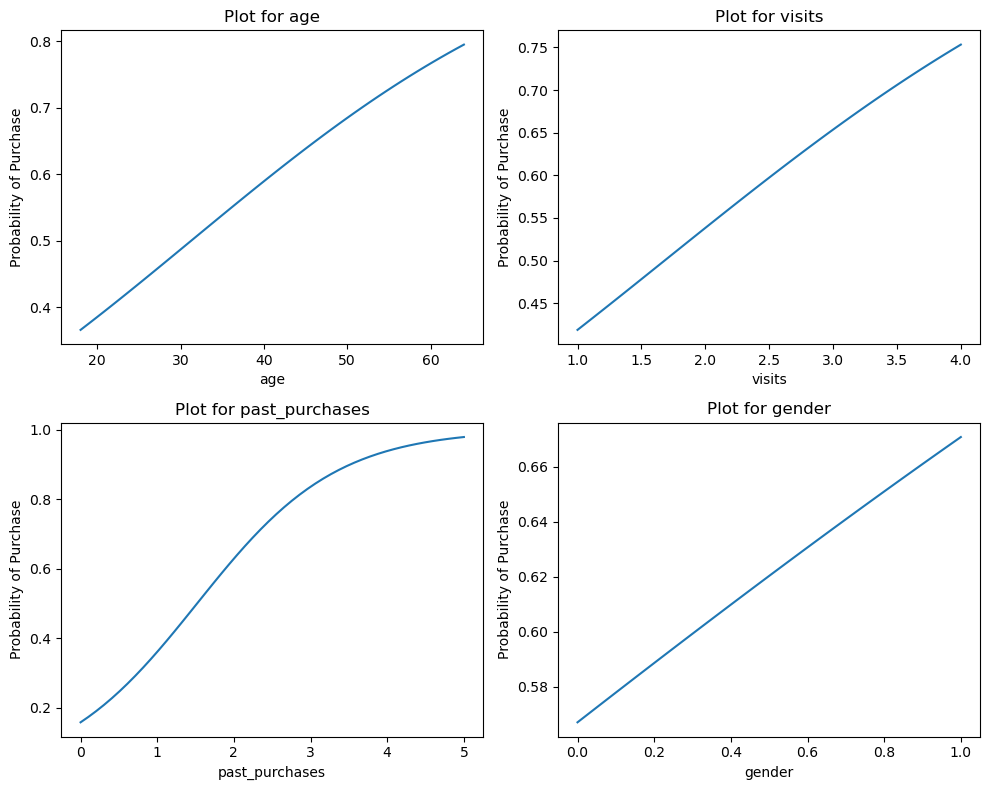

In [100]:
column_dict = {'age':age_span,'visits':visits_span,'past_purchases':past_purchases_span,'gender':gender_M_span}

num_rows = (len(column_dict) + 1) // 2

fig, axs = plt.subplots(num_rows, 2, figsize=(10, 8))

#Flatten the axs array if it has multiple dimensions
if num_rows > 1:
    axs = axs.flatten()
    
for i, column in enumerate(column_dict):
    original_column = df[column].copy()
    df[column] = column_dict[column]
    yhat_probabilities = result.predict(df)

    # Plot the subplot
    axs[i].plot(df[column], yhat_probabilities)
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Probability of Purchase')
    axs[i].set_title(f'Plot for {column}')

    df[column] = original_column

plt.tight_layout() #Better spacing
plt.show()

In [101]:
intercept = result.params[0]
age_coef = result.params[1]
visits_coef = result.params[2]
past_purchases_coef = result.params[3]
gender_coef = result.params[4]

def predict_probability(age, visits, past_purchases, gender):
    
    if gender == "m":
        gender = 1
        gender_label = 'male'
    elif gender == "f":
        gender = 0
        gender_label = 'female'

    z = intercept + age_coef*age + visits_coef*visits + past_purchases_coef*past_purchases + gender_coef*gender
    p = 1 / (1 + np.exp(-z))
    print(f'The probability that someone age {age}, who has vistied {visits} times, purchased {past_purchases} time(s) in the past, and is {gender_label}, will purchase is  {p}')
    

predict_probability(25,1,1,"f")
predict_probability(25,1,1,"m")

The probability that someone age 25, who has vistied 1 times, purchased 1 time(s) in the past, and is female, will purchase is  0.5940899802233435
The probability that someone age 25, who has vistied 1 times, purchased 1 time(s) in the past, and is male, will purchase is  0.2527792599704725


In [102]:
X2 = X[['const','age','visits']]
#Fit the model
reduced_model = sm.Logit(y, X2)
reduced_result = reduced_model.fit()
reduced_result.summary2() #Summary2 includes AIC and BIC

Optimization terminated successfully.
         Current function value: 0.631835
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            Method:           MLE     
Dependent Variable: purchased        Pseudo R-squared: 0.087   
Date:               2023-12-11 21:25 AIC:              69.1835 
No. Observations:   50               BIC:              74.9196 
Df Model:           2                Log-Likelihood:   -31.592 
Df Residuals:       47               LL-Null:          -34.617 
Converged:          1.0000           LLR p-value:      0.048529
No. Iterations:     5.0000           Scale:            1.0000  
-----------------------------------------------------------------
          Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------
const    -1.5902     1.0834   -1.4678   0.1422   -3.7135   0.5332
age       0.0586     0.0257    2.2805   0.0226    0.0082   0.1089
visits   -0.1483     0.3004   -0.4938   0.6214   -0.7370   0.4404
===============================================================

"""

In [103]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Method:           MLE      
Dependent Variable: purchased        Pseudo R-squared: 0.225    
Date:               2023-12-11 21:25 AIC:              63.6389  
No. Observations:   50               BIC:              73.1990  
Df Model:           4                Log-Likelihood:   -26.819  
Df Residuals:       45               LL-Null:          -34.617  
Converged:          1.0000           LLR p-value:      0.0036124
No. Iterations:     6.0000           Scale:            1.0000   
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
const            -1.2181   1.5258 -0.7984 0.4247 -4.2085  1.7723
age               0.0415   0.0275  1.5066 0.1319 -0.0125  0.0954
visits           -0.1541   0.3253 -0.4738 0.6356 -0.7916  0.4834
past_purchases    0.7168   0.5567  1.2875 0.1979 -0.3744  1.8080
gender_M         -1.4647   0.7113 -2.0592 0.0395 -2.8589 -0.0706
================================================================

"""

In [2]:
#Affairs Data
import pandas as pd
import statsmodels.api as sm
df = pd.read_csv('affairs.csv')
df.head()

,affair_count,is_male,age,years_married,have_kids,religiousness_1to5,years_of_education,hollingshead_occupation_code,marriage_rating_1to5
0,0,1,37.0,10.00,0,3,18,7,4
1,0,0,27.0,4.00,0,4,14,6,4
2,0,0,32.0,15.00,1,1,12,1,4
3,0,1,57.0,15.00,1,5,18,6,5
4,0,1,22.0,0.75,0,2,17,6,3


In [24]:
df['cheated'] = df['affair_count'].apply(lambda x: 1 if x != 0 else 0)

y = df['cheated']
X = df[['is_male','age','have_kids','religiousness_1to5','years_of_education']]
X = sm.add_constant(X)

model = sm.Logit(y, X)
result = model.fit()
result.summary2() #Summary2 includes AIC and BIC

Optimization terminated successfully.
         Current function value: 0.540061
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Method:           MLE       
Dependent Variable:  cheated          Pseudo R-squared: 0.039     
Date:                2024-04-15 11:43 AIC:              661.1535  
No. Observations:    601              BIC:              687.5451  
Df Model:            5                Log-Likelihood:   -324.58   
Df Residuals:        595              LL-Null:          -337.69   
Converged:           1.0000           LLR p-value:      8.0756e-05
No. Iterations:      6.0000           Scale:            1.0000    
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const              -0.9693   0.7726 -1.2545 0.2097 -2.4836  0.5450
is_male             0.1881   0.2123  0.8859 0.3757 -0.2280  0.6041
age                 0.0051   0.0116  0.4425 0.6581 -0.0176  0.0278
have_kids           0.8209   0.2580  3.1822 0.0015  0.3153  1.3266
religiousness_1to5 -0.3113   0.0852 -3.6533 0.0003 -0.4783 -0.1443
years_of_education -0.0042   0.0437 -0.0958 0.9237 -0.0899  0.0815
==================================================================

"""

In [34]:
gender = int(input("Male (1) or Female (0)? "))
age = int(input("Age? "))
kids = int(input("Kids, Yes(1) or No(0)? "))
rel = int(input("How religious, 1 to 5? "))
edu = int(input("Years of education? "))

prediction_data = pd.DataFrame({
                         'const': [1],  
                         'is_male': [gender],
                         'age': [age],
                         'have_kids': [kids],
                         'religiousness_1to5': [rel],
                         'years_of_education': [edu]})

p = result.predict(prediction_data)
p

Male (1) or Female (0)?  0
Age?  37
Kids, Yes(1) or No(0)?  1
How religious, 1 to 5?  1
Years of education?  20


0    0.412456
dtype: float64